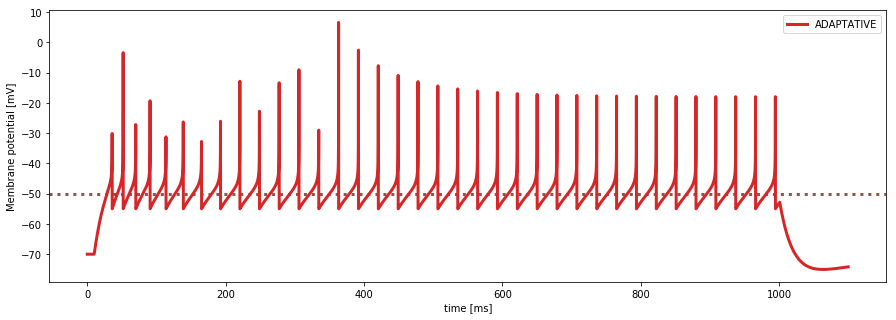

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

# Descrição dos parâmetros
EL = -70*mV; VT = -50*mV; DeltaT = 2*mV; tauw = 100*ms; a = 0*nS; b = 5*pA; Vmax = 20*mV; 
vreset = -55*mV; tau_m = 20*b2.ms; duration = 1100*ms; Rm=500*Mohm; 

C = tau_m/Rm;
condutancia = 1/Rm;

# Corrente gerada
Ix = input_factory.get_step_current(
    t_start=10, t_end=1000, unit_time=b2.ms,
    amplitude= 65*pA) 

# Descrição do modelo neurônio 
start_scope()
eqs = '''dvm/dt = (((condutancia)*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT) -w + Ix(t,i)))/C : volt
         dw/dt=(a*(vm-EL)-w)/tauw : amp
         I : amp'''
G = NeuronGroup(1, eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; w = w + b', method='euler', dt= 0.1*ms)

statemon = StateMonitor(G, ["vm","w"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G) # monitor de spikes
G.vm = EL
G.w = 0

# Rodando a simulação
run(duration)

# Plot
fig = figure(figsize=(15, 5))
plt.figure(1)
axhline(-50, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, statemon.vm[0]/b2.mV, c='C3', lw=3, label = 'ADAPTATIVE')
plt.legend(loc=1)
xlabel('time [ms]')
ylabel('Membrane potential [mV]')
plt.show()